<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [12]:
from google.colab import files
uploaded = files.upload()   # choose DMV_Written_Tests.csv from your computer

Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv


In [13]:
df = pd.read_csv("DMV_Written_Tests.csv")

In [14]:
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

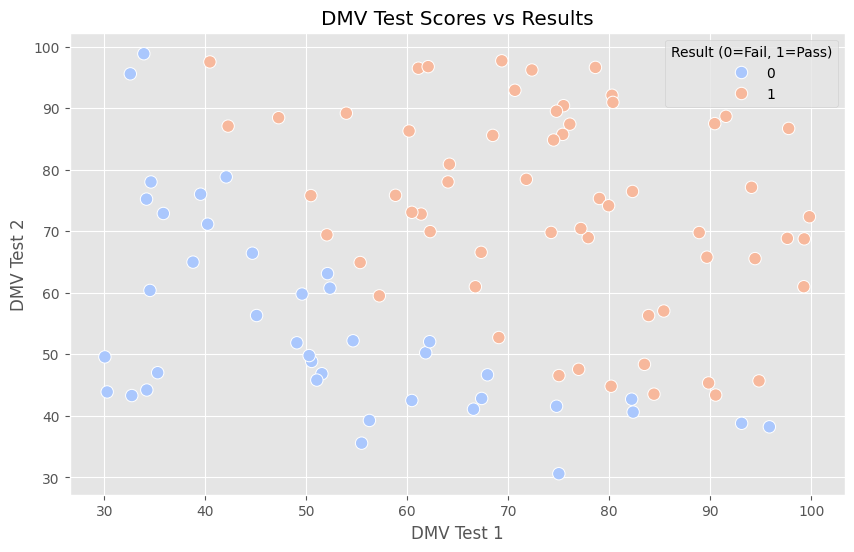

In [15]:
# Task 3: Visualize the Data
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="DMV_Test_1",
    y="DMV_Test_2",
    hue="Results",
    palette="coolwarm",
    data=df,
    s=80
)

plt.title("DMV Test Scores vs Results")
plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")
plt.legend(title="Result (0=Fail, 1=Pass)")
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [16]:
# Task 4: Define the Logistic Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


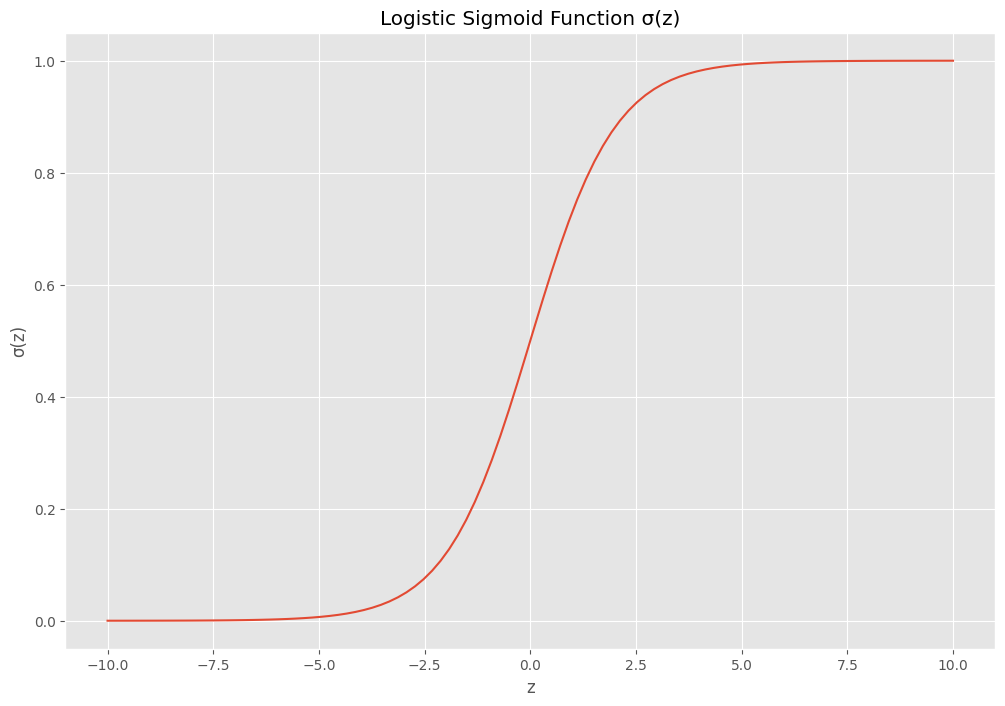

In [17]:
# Plot sigmoid curve
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Logistic Sigmoid Function σ(z)")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [18]:
# Task 5: Define Cost Function and Gradient

import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Cost Function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    # To avoid log(0), clip predictions slightly
    eps = 1e-12
    h = np.clip(h, eps, 1 - eps)
    cost = -(1/m) * (y @ np.log(h) + (1-y) @ np.log(1-h))
    return cost

# Gradient of the Cost Function
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient


### Task 6: Cost and Gradient at Initialization
---

In [19]:
# Prepare dataset
X = df[["DMV_Test_1", "DMV_Test_2"]].to_numpy()
y = df["Results"].to_numpy()

In [20]:
# Add intercept term (bias = 1 for all rows)
X = np.c_[np.ones(X.shape[0]), X]   # shape: (m, n+1)

# Initialize theta as zeros
theta_init = np.zeros(X.shape[1])   # [0, 0, 0]

# Compute cost and gradient at θ = 0
initial_cost = compute_cost(theta_init, X, y)
initial_gradient = compute_gradient(theta_init, X, y)

print("Initial Cost J(θ=0):", initial_cost)
print("Initial Gradient ∇J(θ=0):", initial_gradient)

Initial Cost J(θ=0): 0.6931471805599453
Initial Gradient ∇J(θ=0): [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [21]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1000):
    cost_history = []
    for i in range(num_iters):
        grad = compute_gradient(theta, X, y)
        theta -= alpha * grad
        cost_history.append(compute_cost(theta, X, y))
    return theta, cost_history

In [22]:
# Run gradient descent
theta_final, cost_hist = gradient_descent(X, y, theta_init, alpha=0.01, num_iters=10000)

In [23]:
print("Optimized θ:", theta_final)
print("Final Cost:", cost_hist[-1])

Optimized θ: [-7.65900397  0.41024768 -0.05324509]
Final Cost: 4.296445803986826


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

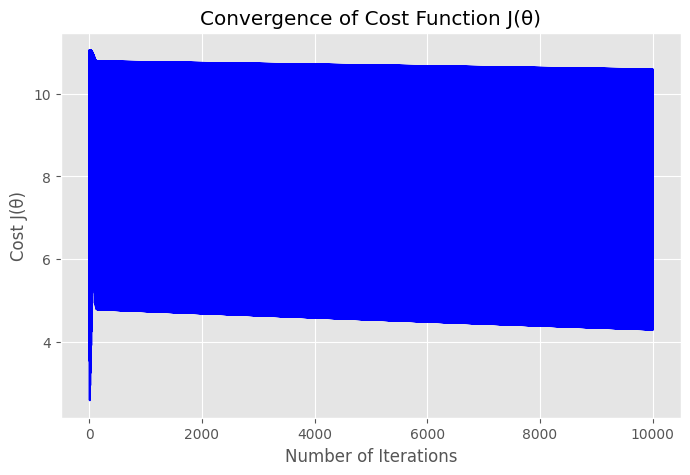

In [24]:
# Task 8: Plotting the Convergence of J(θ)

plt.figure(figsize=(8,5))
plt.plot(range(len(cost_hist)), cost_hist, 'b-')
plt.title("Convergence of Cost Function J(θ)")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

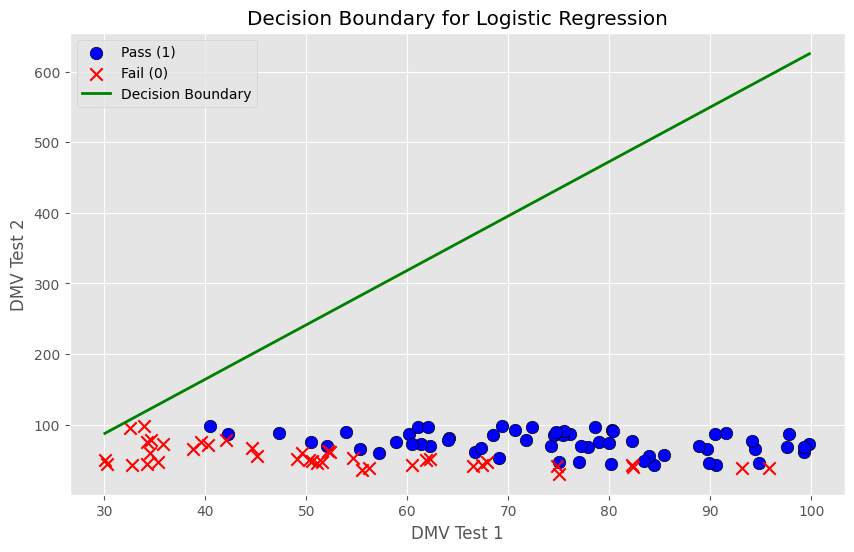

In [26]:
# Task 9: Plotting the Decision Boundary (fixed version)

plt.figure(figsize=(10,6))

# Plot data points
pos = df[df["Results"] == 1]
neg = df[df["Results"] == 0]

plt.scatter(pos["DMV_Test_1"], pos["DMV_Test_2"],
            marker='o', label='Pass (1)', edgecolor='k', c='b', s=80)

plt.scatter(neg["DMV_Test_1"], neg["DMV_Test_2"],
            marker='x', label='Fail (0)', c='r', s=80)

# Plot decision boundary
x_values = np.linspace(df["DMV_Test_1"].min(), df["DMV_Test_1"].max(), 100)
y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]

plt.plot(x_values, y_values, 'g-', linewidth=2, label='Decision Boundary')

plt.xlabel("DMV Test 1")
plt.ylabel("DMV Test 2")
plt.title("Decision Boundary for Logistic Regression")
plt.legend()
plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [27]:
# Task 10: Predictions using optimized theta values

def predict(X, theta):
    """
    Predict class (0/1) using learned logistic regression parameters.
    """
    z = np.dot(X, theta)
    return sigmoid(z)

# Example: predict for a new student
new_student = np.array([1, 45, 85])  # 1 for bias, DMV_Test_1=45, DMV_Test_2=85
prob = predict(new_student, theta_final)

print("Prediction probability:", prob)
print("Predicted class:", 1 if prob >= 0.5 else 0)


Prediction probability: 0.9981232013058887
Predicted class: 1
